# Lab 2 Alpha-expansion

In [1]:
import copy
import numpy as np

from numpy.random import shuffle
from numba import njit
import matplotlib.pyplot as plt
from tqdm import tqdm

import funcs as f
import utils as utl

In [2]:
from time import time
start = time()

---

Input size:  (32, 32)
dtype: uint8 | max: 223 | min: 42


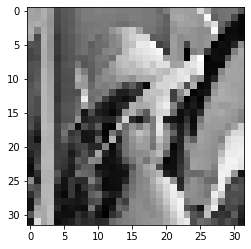

In [3]:
C = np.array([1, 128, 255])
repeats = 5
shape=(32,32)
img = utl.import_img("input.png", bw=True, newshape=shape)

# Main

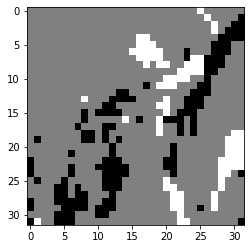

In [4]:
labeling = f.initial_labeling(img, C)
plt.imshow(np.reshape(labeling, shape), cmap='gray')

In [5]:
@njit
def indicator(k, k_, scale):
    if k != k_:
        return scale
    else:
        return 0

@njit
def init_g2(img,  labeling, a_i, scale=40):
    
    h,w = img.shape[:2]
    img = img.flatten()
    g = np.zeros((h*w + 2, h*w + 2), dtype = np.int32)
    
    g[0, 1:-1] = np.abs( a_i - img)
    g[1:-1, -1] = np.abs( labeling - img)
    
    for i in range(h):
        for j in range(w):
            index = j + i*w + 1
            #print(index)
            # left
            if j > 0:
                left_index = j - 1 + i*w + 1
                g[left_index, index] = indicator( labeling[left_index-1], labeling[index-1], scale )
            # right
            if j < w - 1:
                right_index = j + 1 + i*w + 1
                g[right_index, index] = indicator( labeling[right_index-1], labeling[index-1], scale )
             # up
            if i > 0:
                up_index = j + (i-1)*w + 1
                g[up_index, index] = indicator( labeling[up_index-1], labeling[index-1], scale )
            # down
            if i < h - 1:
                down_index = j + (i+1)*w + 1
                g[down_index, index] = indicator( labeling[down_index-1], labeling[index-1], scale )
    return g

In [6]:
for iteration in tqdm(range(repeats)):
    a_shuffle = np.copy(C)
    shuffle(a_shuffle)
    
    for i in range(C.size):

        # 1) alpha_i
        a_i = a_shuffle[i]

        # 2) initial labeling
        k_init = labeling

        # 3) init new graph
        g = init_g2(img, k_init, a_i, scale=40)

        # 4) solve for new binary task
        res = f.Ford_Falkerson(img, g)
        labeling = f.translate_to_labeling(res, k_init, a_i)

  0%|                                                                                            | 0/5 [00:02<?, ?it/s]


ValueError: unable to broadcast argument 1 to output array
File "<ipython-input-5-4db5fa1c6049>", line 1, 

In [ ]:
plt.imshow(np.reshape(res, shape), cmap='gray')

In [ ]:
g

In [ ]:
print(f"Time: {time() - start}")
plt.subplots(figsize=(10, 10))
plt.imshow(np.reshape(labeling, shape), cmap='gray')

---